In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import math
import matplotlib.pyplot as plt
import numpy as np

#Declarando variables

In [ ]:
#Posicion inicial
pos0 = (0,0)
#Posicion actual
posA = pos0
#Coeficiente de resistencia
CD = 0.5
#Densidad del aire
Da = 1.2
#Tiempo, segundo acual en el que nos encotnramos
t = 0

#Diferencial de tiempo aka cuanto tiempo pasa entre cada punto en espacio que encontramos para nuestro objeto
Dt = 0.001

#Gravedad
g = 9.81

#K la constante que encontraremos mas adelante
k = 0

#Aceleracion en ambos ejes.
Ax = 0
Ay = 0

#Velocidad en ambos ejes
Vx = 0
Vy = 0 
#Velocidades iniciales en ambos ejes
V0x = 0
V0y = 0

#@title Datos modificables
Velocidad = 80 #@param {type:"slider", min:50, max:80, step:1}

Radio     = 30 #@param {type:"slider", min:10, max:30, step:1} 
Radio = Radio/100

Masa      = 0.35 #@param {type:"slider", min:0.14, max:0.35, step:0.01}
#Masa = Masa/100

Angulo    = 60 #@param {type:"slider", min:20.0, max:70.0, step:0.1}

#Coordenadas por donde pasara el objeto CONSIDERANDO el viento. Va a estar lleno de duplas ejem: [(1,3),(1,2),(3,4)]
CoordObjViento = []
#Coordenadas por donde pasara el objeto SIN condiderar el viento. Va a estar lleno de duplas ejem: [(1,3),(1,2),(3,4)]
CoordObj = []

In [ ]:
#Solo probando que se actualicen los datos. Una vez se cambien los datos en los sliders solo se tiene que correr lo que viene despues para actualiar todo
print(pos0,CD,Da,Velocidad,Radio,Masa,Angulo)

(0, 0) 0.5 1.2 80 0.3 0.35 60


#Cálculo de la posición en un instante.


##BORRADOR NO OLVIDAR BORRAR Y MEJORAR

Segun lo que dice el profe en la clase, para poder dibujar la parabola vamos a encontrar varios puntos por los que pasa el cuerpo y depues unir esos puntos nos dara la parabola. (no se si se entendio)

Para esto vamos a tener que hacer varios calculos en diferentes instantes de tiempo. Como lo ha mostrado el profe lo simplifico de tal manera en la que podemos usar las formulas de mruv en cada instante.

Entonces el plan es:


1.   Tenemos los datos iniciales
2.   Calculamos donde va a estar el objeto despues de x tiempo concurrido.
3.   Resolvemos la misma formula que utilizamos en el paso 2 pero con los datos que salieron de resultado para encontrar donde estara el objeto en 2x. Esto se repite hasta que la altura del objeto sea 0m.

nota: los datos como velocidad, aceleracion, velocidades en cada eje y aceleraciones en cada eje se van a ir actualizando en cada iteracion.

nota: por si acaso hay un vector que guarda las duplas de las posiciones en cada instante que encontremos.



##Para la verson sin la resistencia del viento
Es solo mruv? o me estoy peridnedo de algo? xD
welp la gravedad tmb afecta. Peor ahoria no peudeo pensar en eso xD supongo que tambien se divide en x e y.




#Codigo



##COmo haremos el programa
Estaba pensando en que el resultado final sean 2 imagens con ambas parabolas (1 en donde esta la version que considera la resistencia del aire y otra que no lo hace). 
Ya tenemos la entrada de datos entonces lo unico que falta es saber que formulas usar en si xD que sigo intentando entender todo bien.
Por otro lado se sabe que si o si la funcion va a tener qeu tener un while que siga hasta que el y=0m como mencionado antes. Entonces todo solo va a tener que estar ahi.

###Funciones para ambos casos


In [ ]:
#Encuentra la velocidad INICIAL para cada eje dependienod de la velocidad en general que tengamos. Al momento de hcaer esto no se si vamos a hacer que esta funcion solo se use al principio y despues ya vamos actualizando la velocidad con la aceleracion o khi xD.
def VIEjes():
    Vx = Velocidad*math.cos(math.radians(Angulo))
    Vy = Velocidad*math.sin(math.radians(Angulo))
    print(Angulo)
    return Vx,Vy

def nice(Va):
    Vx = Va*math.cos(math.radians(Angulo))
    Vy = Va*math.sin(math.radians(Angulo))
    return Vx,Vy

#Vean los apuntes del profe como referencia. Basicamente es una constante que sale a partir de lso datos:
#CORRECCION: es solo area transversal, entonces pi*radio^2
def K():
  return (1/2)*CD*Da*(math.pi*math.pow(Radio,2))

#Encuentra y actualiza la aceleracion en cada eje
def Aejes(k,Vx,Va,Vy):
  Ax = -(k/Masa)*Velocidad* Vx
  Ay = -g - (k/ Masa)* Velocidad * Vy
  return Ax,Ay


#Regresando los datos a velocidad total:
def Vtotal(Vx,Vy):
    v = math.sqrt(math.pow(Vx,2)+math.pow(Vy,2))
    return v


#Actualiza la velocidad para cada eje
def Vejes(V0x,V0y,t,Ax,Ay):
  Vy = V0y + Ay*t
  Vx = V0x + Ax*t

  return Vx,Vy


#MRUV
def MRUV(pos0,Vx,Vy,Ax,Ay):
  x = pos0[0] + Vx*t + 1/2*(Ax * math.pow(t,2))
  y = pos0[1] + Vy*t + 1/2*(Ay * math.pow(t,2))
  return (x,y)



### Considerando la resistencia del viento

In [ ]:
#Valores iniciales
V0x = 0
V0y = 0
Va = Velocidad 
x0 = 0
y0 = 0
t = 0
A0x = 0
A0y = 0


#Calculamos k
k = K()

#Necesitamos un while que continue hasta que la altura sea = 0.
while (True):
  t += Dt

  V0x,V0y = nice(Va)
  Va = Vtotal(V0x,V0y)

  A0x, A0y = Aejes(k,V0x,V0y,Va)


  posA = MRUV((x0,y0),V0x,V0y,A0x,A0y)

  CoordObjViento.append(posA)  

  Vx,Vy = Vejes(V0x,V0y,t,A0x,A0y)

  V0x = Vx
  V0y = Vy
  x0 = posA[0]
  y0 = posA[1]

  
  

  #Condicional de salida
  if (posA[1] <= 0):
    break
  



In [ ]:
xViento = []
yViento = []
for i in range(len(CoordObjViento)):
  xViento.append(CoordObjViento[i][0])
  yViento.append(CoordObjViento[i][1])
  
print(xViento)
print(len(xViento))
print("Distancia en el eje x en metros cuando la altura regresa a 0 aprox: ",max(yViento))

print("Distancia en el eje x en metros cuando la altura regresa a 0 aprox: ",max(xViento))


[0.039612237706756925, 0.11806118853378461, 0.2345713278945969, 0.3883671312027076, 0.5786730738716306, 0.8047136313148796, 1.0657132789459687, 1.3608964921784115, 1.6894877464257219, 2.050711517101414, 2.443792279619001, 2.8679545093919976, 3.3224226818339164, 3.806421272358272, 4.319174756378579, 4.85990760930835, 5.4278443065610995, 6.022209323550341, 6.642227135689589, 7.287122218392356, 7.956119047072157, 8.648442097142505, 9.363315844016913, 10.099964763108899, 10.857613329831974, 11.63548601959965, 12.432807307825444, 13.248801669922868, 14.082693581305437, 14.933707517386662, 15.80106795358006, 16.683999365299144, 17.581726227957425, 18.49347301696842, 19.418464207745643, 20.35592427570261, 21.305077696252827, 22.265148944809813, 23.235362496787083, 24.21494282759815, 25.20311441265653, 26.199101727375734, 27.202129247169275, 28.211421447450665, 29.22620280363342, 30.245697791131057, 31.26913088535709, 32.295726561725026, 33.32470929564838, 34.355303562540676, 35.38673383781541

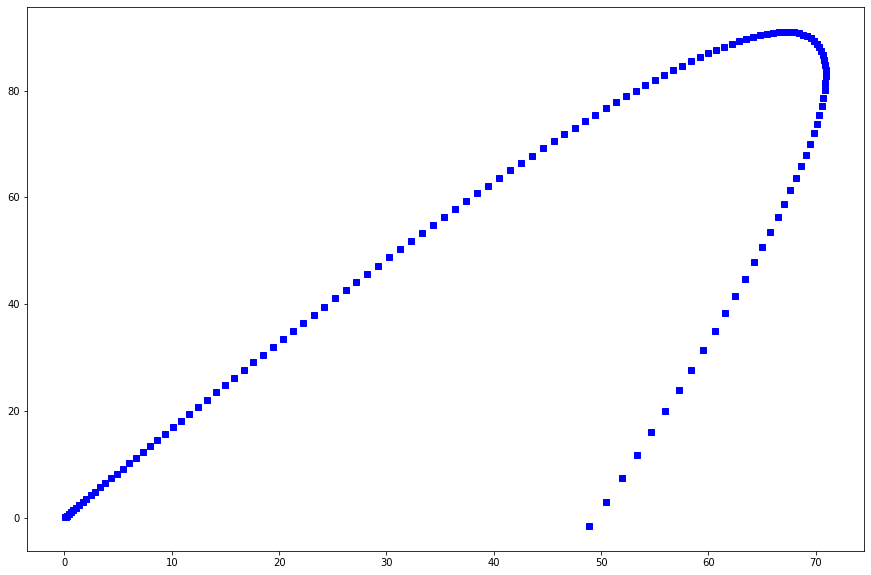

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
#Modificar el ultimo numero de la funcion de abajo para ver mejor los axis
#plt.xticks(np.arange(0, xViento[-1]+1, 1))
#plt.yticks(np.arange(0, max(yViento)+1, 10))
ax.plot(xViento,yViento, 'bs')

In [ ]:
t= 0
#Encontramos la velocidad INICIAL en cada eje;  (Estamos encontrando todos los datos iniciales que nececitamos)
V0x,V0y = VIEjes()
print("Velocidades iniciales:",V0x,V0y)
#NO calculamos K porque no necesitamos considerar la resistencia del aire
X0 = 0
Y0 = 0
pos0 = (X0, Y0)
posA = pos0

#Necesitamos un while que continue hasta que la altura sea = 0.
while (True):
  #Actualizamos el instante de tiempo en el que nos encontramos
  t += Dt
  #Encontramos la aceleracion en cada eje.
    #En nuetro caso como no consideramos el aire no hay aceleracion en ej el eje x
  Ax = 0
    #En el eje y solo afecta el la gravedad, entonces
  Ay = -g
  #Encontramos la velocidad en cada eje.
  Vx,Vy = Vejes(V0x,V0y,t,Ax,Ay)
  #print("Velocidades despues de un tik:", Vx,Vy)

  posA = MRUV(pos0,Vx,Vy,Ax,Ay)


  #Encontramos el x,y en el que se encuentra nuestro objeto en esnte instante de tiempo.
  CoordObj.append(posA)

  #Condicional de salida
  if (posA[1] <= 0):
    break
  

print(CoordObjViento)
print(len(CoordObjViento))

60
Velocidades iniciales: 40.00000000000001 69.28203230275508
[(0.039612237706756925, 0.06850160271626893), (0.11806118853378461, 0.20394394897583445), (0.2345713278945969, 0.40476617960572425), (0.3883671312027076, 0.669407435432966), (0.5786730738716306, 0.9963068572845872), (0.8047136313148796, 1.3839035859876159), (1.0657132789459687, 1.8306367623690794), (1.3608964921784115, 2.3349455272560053), (1.6894877464257219, 2.8952690214754218), (2.050711517101414, 3.5100463858543565), (2.443792279619001, 4.177716761219837), (2.8679545093919976, 4.896719288398891), (3.3224226818339164, 5.665493108218545), (3.806421272358272, 6.482477361505827), (4.319174756378579, 7.346111189087766), (4.85990760930835, 8.25483373179139), (5.4278443065610995, 9.207084130443725), (6.022209323550341, 10.2013015258718), (6.642227135689589, 11.235925058902641), (7.287122218392356, 12.309393870363277), (7.956119047072157, 13.420147101080733), (8.648442097142505, 14.56662389188204), (9.363315844016913, 15.7472633

In [ ]:
xSViento = []
ySViento = []
for i in range(len(CoordObj)):
  xSViento.append(CoordObj[i][0])
  ySViento.append(CoordObj[i][1])

print(xSViento)
print(len(xSViento))
print("Distancia en el eje x en metros cuando la altura regresa a 0 aprox: ",max(ySViento))

print("Distancia en el eje x en metros cuando la altura regresa a 0 aprox: ",max(xSViento))

[0.04000000000000001, 0.08000000000000002, 0.12000000000000002, 0.16000000000000003, 0.20000000000000004, 0.24000000000000005, 0.2800000000000001, 0.32000000000000006, 0.3600000000000001, 0.40000000000000013, 0.44000000000000017, 0.48000000000000026, 0.5200000000000002, 0.5600000000000003, 0.6000000000000003, 0.6400000000000005, 0.6800000000000005, 0.7200000000000005, 0.7600000000000006, 0.8000000000000006, 0.8400000000000006, 0.8800000000000007, 0.9200000000000007, 0.9600000000000007, 1.0000000000000009, 1.040000000000001, 1.080000000000001, 1.120000000000001, 1.160000000000001, 1.200000000000001, 1.240000000000001, 1.2800000000000011, 1.3200000000000012, 1.3600000000000012, 1.4000000000000012, 1.4400000000000013, 1.4800000000000013, 1.5200000000000014, 1.5600000000000014, 1.6000000000000014, 1.6400000000000015, 1.6800000000000015, 1.7200000000000015, 1.7600000000000016, 1.8000000000000016, 1.8400000000000016, 1.8800000000000017, 1.9200000000000017, 1.9600000000000017, 2.0000000000000

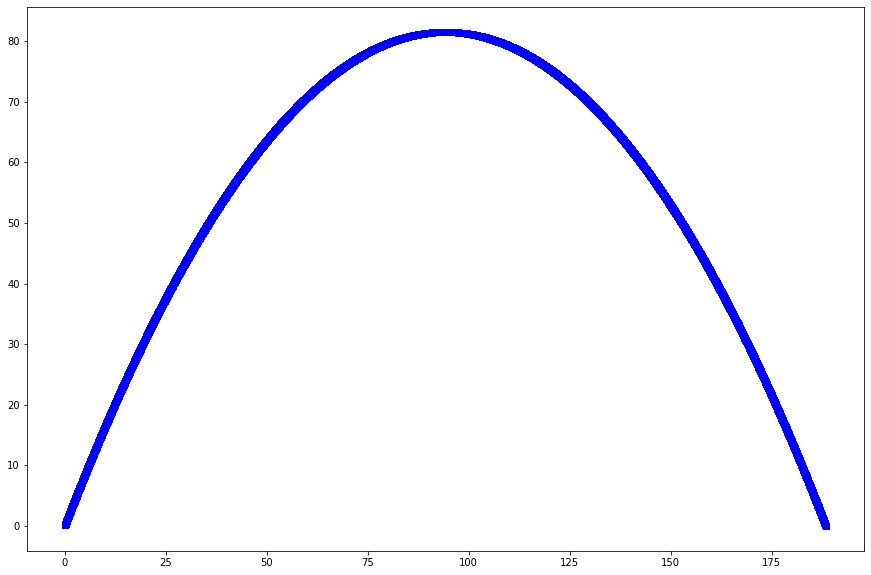

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
#Modificar el ultimo numero de la funcion de abajo para ver mejor los axis
#plt.xticks(np.arange(0, xViento[-1]+1, 1))
#plt.yticks(np.arange(0, max(yViento)+1, 10))
ax.plot(xSViento,ySViento, 'bs')

In [ ]:
#Haciendo limpieza de las variables para correr todo again.
del CoordObj; 
del CoordObjViento
del xViento
del yViento
del xSViento
del ySViento